In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Student_Mental_Health_Data_Cleaned.csv")

In [6]:
df.head()

,Date,Time,Gender,Age,Course,Maritial_Status,Depression,Anxeity,Panic_Attack,Treatment,L_E_CGPA,H_E_CGPA,Year_Number
0,07/08/2020,12:02,Female,18,Engineering,No,Yes,No,Yes,No,3.0,3.49,1
1,07/08/2020,12:04,Male,21,Islamic Education,No,No,Yes,No,No,3.0,3.49,2
2,07/08/2020,12:05,Male,19,Bit,No,Yes,Yes,Yes,No,3.0,3.49,1
3,07/08/2020,12:06,Female,22,Laws,Yes,Yes,No,No,No,3.0,3.49,3
4,07/08/2020,12:13,Male,23,Mathemathics,No,No,No,No,No,3.0,3.49,4


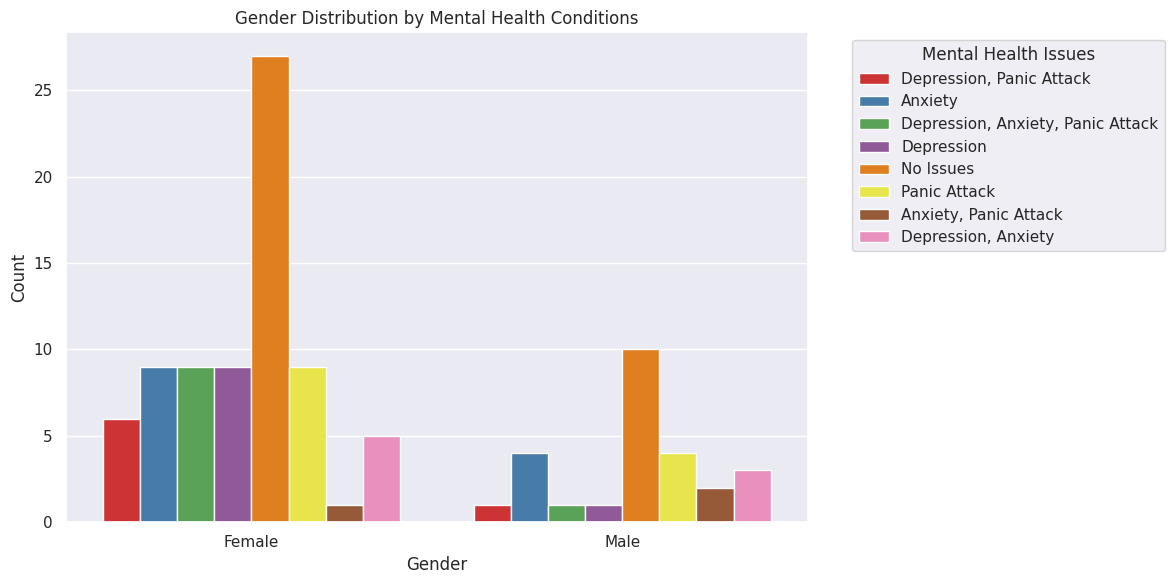

In [61]:
# ---------------------- Create a Readable Combined Mental Health Label ----------------------
# Define a function to combine multiple mental health conditions into a single label per student.
# If the student has multiple issues, they are combined into a comma-separated string.
# If no issues are reported, label it as 'No Issues'.
def format_mental_status(row):
    status = []
    if row['Depression'] == 'Yes':
        status.append('Depression')
    if row['Anxeity'] == 'Yes':
        status.append('Anxiety')
    if row['Panic_Attack'] == 'Yes':
        status.append('Panic Attack')
    return ', '.join(status) if status else 'No Issues'

# Apply the formatting function to each row in the DataFrame
df['Mental_Health_Status'] = df.apply(format_mental_status, axis=1)

# Plotting the distribution of combined mental health statuses across genders
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', data=df, palette='Set1', hue='Mental_Health_Status')
plt.title('Gender Distribution by Mental Health Conditions')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Mental Health Issues', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

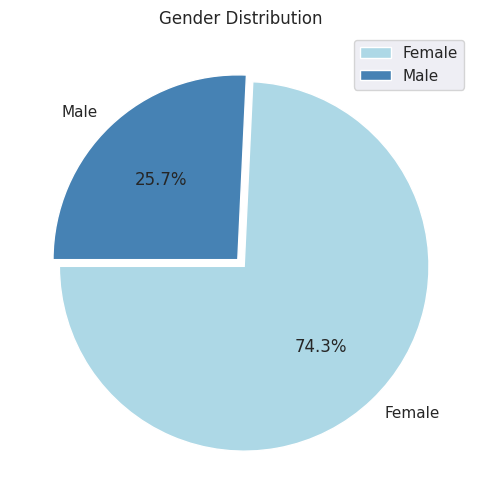

In [68]:
# ---------------------- Pie Chart: Gender Distribution ----------------------
# Plotting a pie chart to visualize the proportion of students by gender.
# The explode parameter slightly separates the slices for emphasis.
# Custom colors and percentage labels enhance readability.
plt.figure(figsize=(12,6))
plt.pie(df['Gender'].value_counts(),
        explode=(0.025, 0.025),
        labels=df['Gender'].value_counts().index,
        colors=['lightblue', 'steelblue'],
        autopct='%1.1f%%',
        startangle=180)
plt.title("Gender Distribution")
plt.legend()
plt.show()

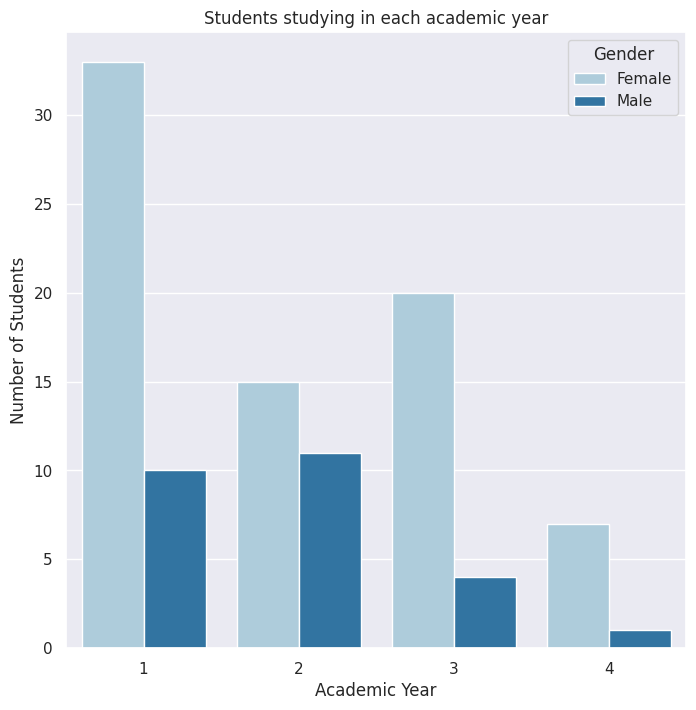

In [66]:
# ---------------------- Bar Chart: Students by Academic Year and Gender ----------------------
# Using a countplot to display the number of students in each academic year,
# separated by gender for comparison.
plt.figure(figsize=(8, 8))
sns.countplot(x='Year_Number', hue='Gender', data=df, palette = 'Paired')
plt.title("Students studying in each academic year")
plt.xlabel("Academic Year")
plt.ylabel("Number of Students")
plt.show()

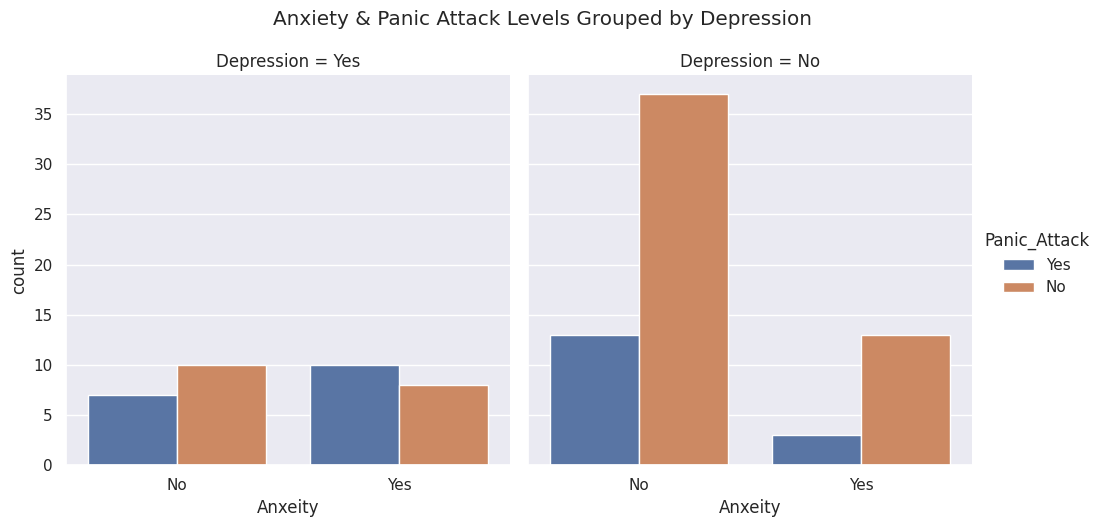

In [51]:
# ---------------------- CatPlot: Anxiety & Panic Attack Grouped by Depression ----------------------
# This count plot (faceted by depression status) shows how students with anxiety
# also report panic attacks, providing insight into co-occurring mental health conditions.
g = sns.catplot(
    x='Anxeity',
    hue='Panic_Attack',
    col='Depression',
    data=df,
    kind='count',
    height=5,
    aspect=1
)

g.fig.suptitle("Anxiety & Panic Attack Levels Grouped by Depression", y=1.05)
plt.show()

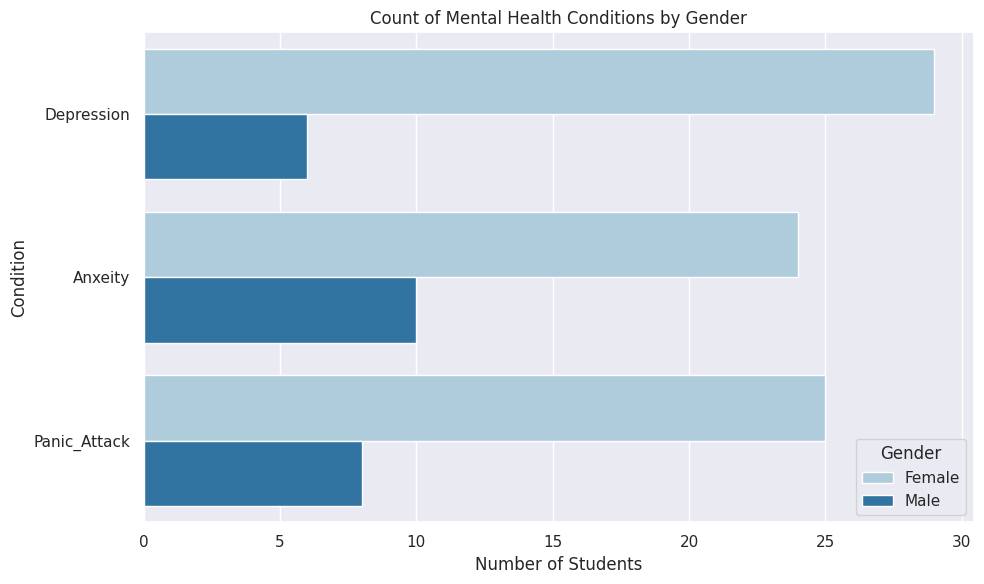

In [65]:
# ---------------------- Count of Mental Health Conditions by Gender ----------------------
# Select relevant columns for mental health conditions
condition_cols = ["Depression", "Anxeity", "Panic_Attack"]

# Filter rows where at least one condition is 'Yes'
summary = df[df[condition_cols].isin(["Yes"]).any(axis=1)]

# Convert wide-format to long-format for grouped plotting
grouped = summary[condition_cols + ['Gender']].melt(id_vars='Gender')
grouped = grouped[grouped['value'] == 'Yes']

# Create a horizontal bar chart showing the count of each condition by gender
plt.figure(figsize=(10, 6))
sns.countplot(y='variable', hue='Gender', data=grouped, palette = 'Paired')
plt.title("Count of Mental Health Conditions by Gender")
plt.xlabel("Number of Students")
plt.ylabel("Condition")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

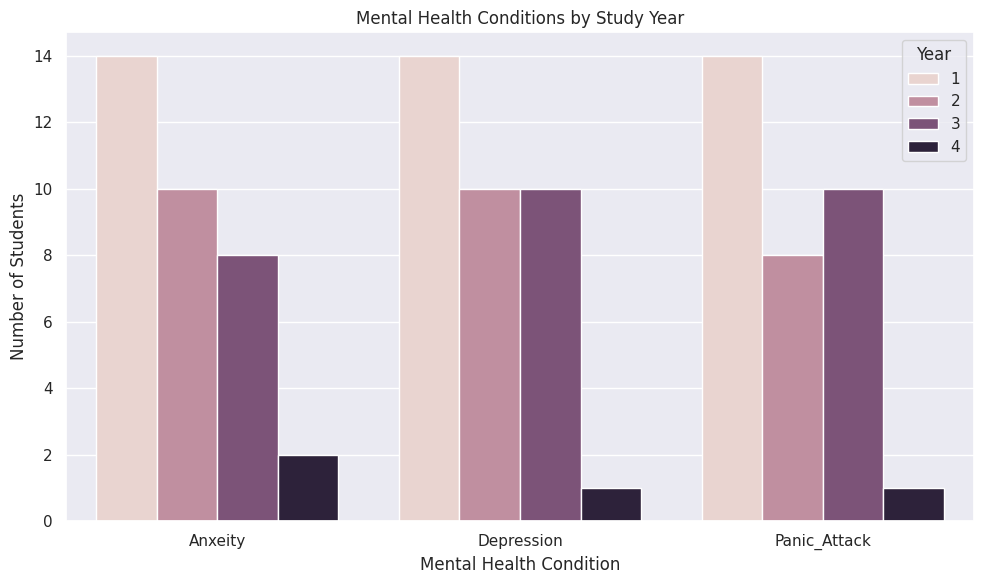

In [57]:
# ---------------------- Mental Health Conditions by Study Year ----------------------
# Melt the dataset into long-form to facilitate plotting across multiple conditions
melted_df = df.melt(id_vars="Year_Number",
                    value_vars=["Anxeity", "Depression", "Panic_Attack"],
                    var_name="Condition",
                    value_name="Response")

# Filter for students who answered 'Yes' to each condition
melted_df = melted_df[melted_df["Response"] == "Yes"]

# Create a count plot showing mental health condition distribution by study year
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=melted_df, x="Condition", hue="Year_Number")
plt.title("Mental Health Conditions by Study Year")
plt.xlabel("Mental Health Condition")
plt.ylabel("Number of Students")
plt.legend(title="Year")
plt.tight_layout()
plt.show()

<ipython-input-81-94ba3f3677eb>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = melted_df.groupby(['Condition', 'CGPA_Category']).size().reset_index(name='Count')


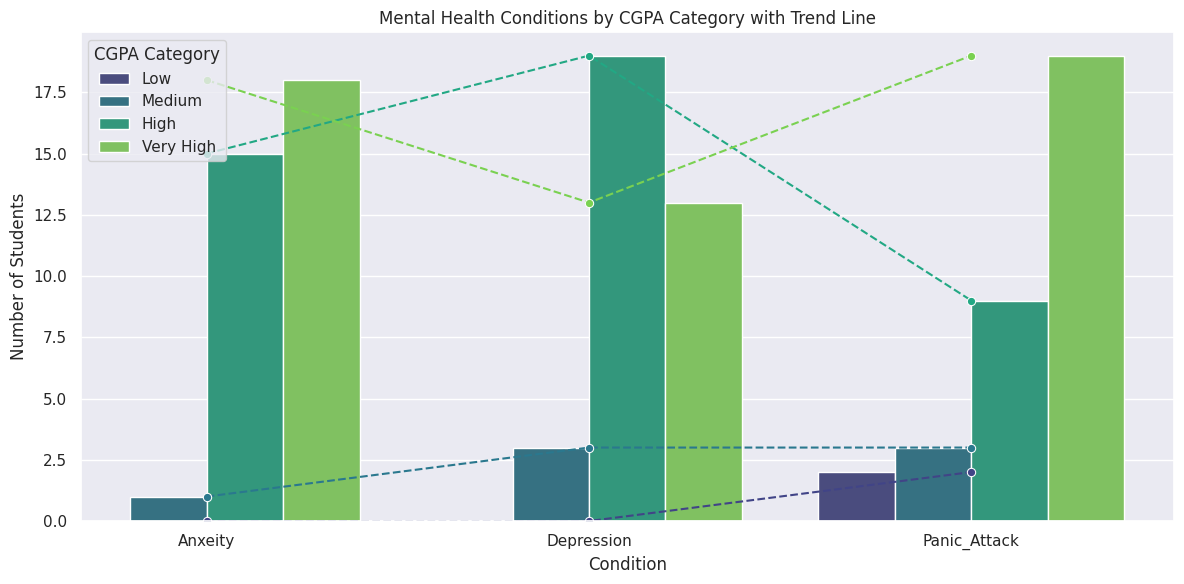

In [81]:
# ---------------------- Mental Health by CGPA Category with Trend Lines ----------------------
# Create a new column for average CGPA using the lower and higher estimated values
df["Avg_CGPA"] = (df["L_E_CGPA"] + df["H_E_CGPA"]) / 2

# Bucket average CGPA into labeled categories for grouping
df["CGPA_Category"] = pd.cut(df["Avg_CGPA"],
                             bins=[0, 2.5, 3.0, 3.5, 4.0],
                             labels=["Low", "Medium", "High", "Very High"])

# Reshape data to long form for plotting conditions
melted_df = df.melt(id_vars="CGPA_Category",
                    value_vars=["Anxeity", "Depression", "Panic_Attack"],
                    var_name="Condition",
                    value_name="Response")

# Filter for only 'Yes' responses
melted_df = melted_df[melted_df["Response"] == "Yes"]

# Create the countplot to show how conditions vary by CGPA category
plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Condition", hue="CGPA_Category", data=melted_df, palette = 'viridis')

# ---------------------- Add Trend Lines ----------------------
# Calculate counts per condition and CGPA category for trend visualization
counts = melted_df.groupby(['Condition', 'CGPA_Category']).size().reset_index(name='Count')

# Overlay line plots to visualize trends of each CGPA category across conditions
sns.lineplot(data=counts, x="Condition", y="Count", hue="CGPA_Category", palette = 'viridis',
             marker="o", linestyle="--", legend=False, ax=ax)

# Final plot formatting
plt.title("Mental Health Conditions by CGPA Category with Trend Line")
plt.xlabel("Condition")
plt.ylabel("Number of Students")
plt.legend(title="CGPA Category", loc="upper left")
plt.tight_layout()
plt.show()